Comparison between Corrfunc, F-corrfunc and Linear theory results 
for the density auto-correlation function in realspace
testing for the case of PBC

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD
from hankel import HankelTransform
from datetime import datetime
from scipy.interpolate import InterpolatedUnivariateSpline as spline 
path = '/Users/ngoc/Desktop/Master-study/project'

In [2]:
#cosmological parameters
z        = 0.306
Omg_lamb = 0.685
Omg_m    = 1 - Omg_lamb
a        = 1/(1 + z)
E_a      = np.sqrt(Omg_m*(1+z)**3 + Omg_lamb)

In [3]:
#simulation parameter
boxsize  = 2000            # [Mpc/h]
nthreads = 4               # The number of OpenMP threads to use
autocorr = 1               # 1 for auto-correlation, 0 for cross-correlation
nbins    = 50              # number of bins
r_min    = 1               # [Mpc/h]
r_max    = boxsize/3       # [Mpc/h]
bins     = np.logspace(np.log10(r_min), np.log10(r_max), nbins + 1)


In [4]:
#load positions of objects
X = np.loadtxt(path+'/catalogs/11/gals/2gpc/R111_S014_clu_d.cat', usecols = (1))
Y = np.loadtxt(path+'/catalogs/11/gals/2gpc/R111_S014_clu_d.cat', usecols = (2))
Z = np.loadtxt(path+'/catalogs/11/gals/2gpc/R111_S014_clu_d.cat', usecols = (3))

weights = np.full_like(X,1)

#calculate data-data pairs
results_DD = DD(autocorr,
                nthreads,
                bins,
                X, Y, Z,
                weights1    = weights,
                boxsize     = boxsize,
                weight_type = 'pair_product',
                output_ravg = True,
                periodic    = True) 

#calculate random-random pairs in PBC case
N_halo = len(X)

#random-random pairs in the case of PBC
RR  = (4./3.*np.pi*(bins[1::]**3 - bins[0:-1:]**3))*N_halo*(N_halo-1)/boxsize**3
 
xi  = results_DD['npairs']*results_DD['weightavg']/RR - 1
r   = results_DD['ravg']


In [15]:
# Linear theory
b   = 3.11
k   = np.loadtxt(path+'/results/power_spectrum.txt', usecols = (0))
P   = np.loadtxt(path+'/results/power_spectrum.txt', usecols = (1))
P_k = spline(k, P)
h0  = HankelTransform(nu=1/2, N = 2000, h = 1e-3)

# xi density in real space
f_0 = lambda k: P_k(k)*k**(1/2)/(np.pi*2)**(3/2)

xi_theory = 1/np.sqrt(r_f)*h0.transform(f_0,r_f, ret_err=False, inverse=True)*b**2

In [17]:
# load result of F-corrfunc for PBC case

xi_f = np.loadtxt(path+'/my-f-code/results/xi-PBC-test3.txt', usecols = (0))
r_f  = np.loadtxt(path+'/my-f-code/results/xi-PBC-test3.txt', usecols = (1))

xi_f = xi_f/RR-1

Text(0.5, 1.0, '$\\xi_{dd}$ in real space')

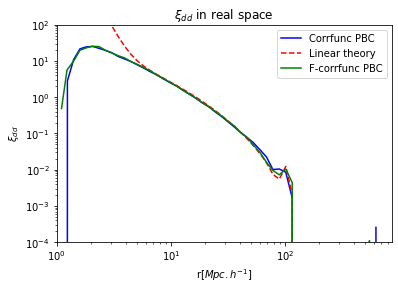

In [18]:
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(r,   xi,        'b-',  label='Corrfunc PBC')
ax.plot(r_f, xi_theory, 'r--', label='Linear theory')
ax.plot(r_f, xi_f,      'g-',  label='F-corrfunc PBC')
ax.set_ylabel("$\\xi_{dd}$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
ax.legend()
ax.set_ylim(1e-4,1e2)
ax.set_xlim(1,)
ax.set_title('$\\xi_{dd}$ in real space')


My result of F-corrfunc doesn't fit with the results from Corrfunc and also the Linear theory, what's wrong with it??